<a href="https://colab.research.google.com/github/thnavear/Qualcomm-DL-Hackathon/blob/master/DLH_try3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!nvidia-smi

Sun Jun 28 08:51:42 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8     9W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Emergency vs Non-Emergency Vehicle Classification

Fatalities due to traffic delays of emergency vehicles such as ambulance & fire brigade is a huge problem. In daily life, we often see that emergency vehicles face difficulty in passing through traffic. So differentiating a vehicle into an emergency and non emergency category can be an important component in traffic monitoring as well as self drive car systems as reaching on time to their destination is critical for these services.

In this problem, you will be working on classifying vehicle images as either belonging to the emergency vehicle or non-emergency vehicle category. For the same, you are provided with the train and the test dataset. Emergency vehicles usually includes police cars, ambulance and fire brigades.


1. Type of Data and  Problem

Type of data is images.
There are 2 classes in total


    Emergency Vehicle
    Non-Emergency Vehicle
    
This is a binary classification problem.    

Problem classificaion where we need to identify the  type of vehicle



In [ ]:
%cd /content/drive/My Drive/analytic Vidhya CV/

/content/drive/My Drive/analytic Vidhya CV


In [1]:
!git clone https://github.com/Prashant-AV/Qualcomm-DL-Hackathon.git

Cloning into 'Qualcomm-DL-Hackathon'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 30.68 MiB | 19.46 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [2]:
!unzip "/content/Qualcomm-DL-Hackathon/train/images part-1.zip"
!unzip "/content/Qualcomm-DL-Hackathon/train/images part-2.zip"

# prompt: merge contents of two folders

import shutil
import os

def merge_folders(source_folder1, source_folder2, destination_folder):
    # Create the destination folder if it doesn't exist
    os.makedirs(destination_folder, exist_ok=True)

    # Iterate through the files in the first source folder
    for filename in os.listdir(source_folder1):
        source_path = os.path.join(source_folder1, filename)
        destination_path = os.path.join(destination_folder, filename)
        if os.path.isfile(source_path):  # Only copy files, not subfolders
            shutil.copy2(source_path, destination_path)  # copy2 preserves metadata

    # Iterate through the files in the second source folder
    for filename in os.listdir(source_folder2):
        source_path = os.path.join(source_folder2, filename)
        destination_path = os.path.join(destination_folder, filename)
        if os.path.isfile(source_path):  # Only copy files, not subfolders
            shutil.copy2(source_path, destination_path)  # copy2 preserves metadata

# Example usage (replace with your actual folder paths)
source_folder1 = "/content/images part-1"
source_folder2 = "/content/images part-2"
destination_folder = "/content/merged_images"

merge_folders(source_folder1, source_folder2, destination_folder)
print(f"Folders '{source_folder1}' and '{source_folder2}' merged into '{destination_folder}'")


# prompt: 1.read file names from column name "image_names" in file "/content/Qualcomm-DL-Hackathon/train/train.csv" and copy the corresponding file from "/content/merged_images" and move them to "/content/test_images".
# 2.read file names from column name "image_names" in file "/content/Qualcomm-DL-Hackathon/test.csv" and copy the corresponding file from "/content/merged_images" and move them to "/content/test_images"

import pandas as pd
import shutil
import os

# Create the destination folder if it doesn't exist
os.makedirs("/content/train_images", exist_ok=True)
os.makedirs("/content/test_images", exist_ok=True)


# 1. Process train.csv
train_df = pd.read_csv("/content/Qualcomm-DL-Hackathon/train/train.csv")
for image_name in train_df["image_names"]:
    source_path = os.path.join("/content/merged_images", image_name)
    destination_path = os.path.join("/content/train_images", image_name)
    if os.path.exists(source_path):
        shutil.copy2(source_path, destination_path)
    else:
        print(f"Warning: Source file not found: {source_path}")

# 2. Process test.csv
test_df = pd.read_csv("/content/Qualcomm-DL-Hackathon/test.csv")
for image_name in test_df["image_names"]:
    source_path = os.path.join("/content/merged_images", image_name)
    destination_path = os.path.join("/content/test_images", image_name)
    if os.path.exists(source_path):
        shutil.copy2(source_path, destination_path)
    else:
        print(f"Warning: Source file not found: {source_path}")

print("Image copying complete.")

Archive:  /content/Qualcomm-DL-Hackathon/train/images part-1.zip
   creating: images part-1/
  inflating: images part-1/0.jpg     
  inflating: images part-1/1.jpg     
  inflating: images part-1/10.jpg    
  inflating: images part-1/100.jpg   
  inflating: images part-1/1000.jpg  
  inflating: images part-1/1001.jpg  
  inflating: images part-1/1002.jpg  
  inflating: images part-1/1003.jpg  
  inflating: images part-1/1004.jpg  
  inflating: images part-1/1005.jpg  
  inflating: images part-1/1006.jpg  
  inflating: images part-1/1007.jpg  
  inflating: images part-1/1008.jpg  
  inflating: images part-1/1009.jpg  
  inflating: images part-1/101.jpg   
  inflating: images part-1/1010.jpg  
  inflating: images part-1/1011.jpg  
  inflating: images part-1/1012.jpg  
  inflating: images part-1/1013.jpg  
  inflating: images part-1/1014.jpg  
  inflating: images part-1/1015.jpg  
  inflating: images part-1/1016.jpg  
  inflating: images part-1/1017.jpg  
  inflating: images part-1/1018.j

In [3]:
#imports
import os
import torch
import pandas as pd
import numpy as np
from tqdm import tqdm


from torch.utils.data import Dataset, random_split, DataLoader


# from fastai.vision import *
from PIL import Image,ImageFilter
import torchvision.models as models
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from sklearn.metrics import f1_score
import torch.nn.functional as F
import torch.nn as nn
from torchvision.utils import make_grid
%matplotlib inline


train_path = '/content/Qualcomm-DL-Hackathon/train/train.csv'
test_path = '/content/Qualcomm-DL-Hackathon/test.csv'


In [4]:
#creating a dataset path
!head "{train_path}"

image_names,emergency_or_not
1503.jpg,0
1420.jpg,0
1764.jpg,0
1356.jpg,0
1117.jpg,0
45.jpg,1
2313.jpg,0
1657.jpg,0
294.jpg,1


0 - stands for Non Emergency
</br>
1 - stands for Emergency

In [5]:


classes  = [
    'emergency',
    'non_emergency'
    ]




In [6]:
len(classes)

2

# Image with Label 0

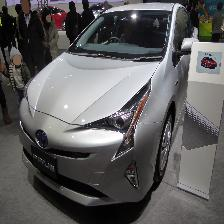

In [6]:
Image.open('/content/train_images/1503.jpg')

# Image with Label 1

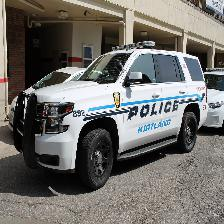

In [9]:
Image.open('/content/train_images/45.jpg')


Looking at the images I would like to apply a medium filter.

Lets see the output of the above image without median filter.

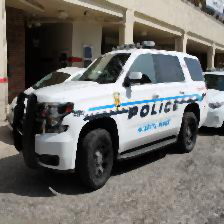

In [ ]:
Image.open('images/45.jpg').filter(ImageFilter.MedianFilter)

In [7]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')


device = get_default_device()


def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)


# checking class balance

In [8]:
train = pd.read_csv('/content/Qualcomm-DL-Hackathon/train/train.csv')

print(train.columns)

train['emergency_or_not'].value_counts()

Index(['image_names', 'emergency_or_not'], dtype='object')


,count
emergency_or_not,
0,965
1,681


In [9]:
class0_index = train[train.emergency_or_not == 0].index.values

class1_index = train[train.emergency_or_not == 1].index.values

In [13]:
class1_index[0]

5

There is not a huge imbalance we can work with it. Later we can try making both class equal in the data augmentation part.

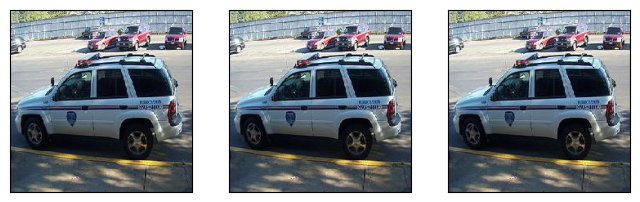

In [10]:
# Findings
# There were some images given the wrong class
# There were some images of the interior (dashboard) of the car instead
# of the cars

# Since there its a small dataset there are only 706 dataset which can easily
# be skimmed  through.

#The original EDA Notebook is provided in my github repo.



# Images with wrong labels:

fig,ax = plt.subplots(1,3,figsize = (8,8))

ls = [3,1348,497]

for index,axs in enumerate(ax.flatten()):

      axs.imshow(Image.open(f"/content/train_images/{train.iloc[ls[index]]['image_names']}"))
      axs.set_xticks([])
      axs.set_yticks([])


Instead of changing the the labels I decided to remove the images because there were already present in the train set. So redundent data will only increase the train time.

removing the above 3 sampels from the train dataframe. I decided to create a new dataframe

In [11]:
idx =  [3,1348,497]

#removing rows from train.csv

print(len(train))

train1 = train.drop(axis= 0 ,index = idx)

train1.to_csv('/content/train_images/train1.csv',index = False)




1646


traning the model on the new dataset imporoved the val_score by 2%

# Images Not of Cars


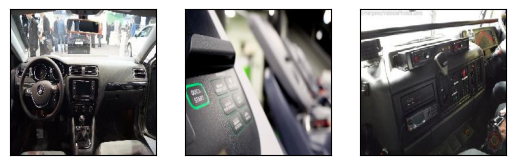

In [12]:

fig,ax = plt.subplots(1,3)

ls = [240,479,405]

for index,axs in enumerate(ax.flatten()):

      axs.imshow(Image.open(f"/content/train_images/{train.iloc[ls[index]]['image_names']}"))
      axs.set_xticks([])
      axs.set_yticks([])

In [13]:
idx =  [240,479,405]

#removing rows from train.csv

print(len(train1))

train2 = train1.drop(axis= 0 ,index = idx)

train2.to_csv('/content/train_images/train2.csv',index = False)

print(len(train2))



1643
1640


# Building The DataSet

In [14]:
#creating dataset and data loaders

class VehicleDataset(Dataset):

    def __init__(self,csv_name,folder,transform = None,label = False):

        self.label = label

        self.folder = folder
        print(csv_name)
        self.dataframe = pd.read_csv(self.folder+'/'+csv_name+'.csv')
        self.tms = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self,index):

        row = self.dataframe.iloc[index]

        img_index = row['image_names']

        image_file = self.folder + '/' + img_index

        image = Image.open(image_file)


        if self.label:
            target = row['emergency_or_not']

            if target == 0:
              encode  = torch.FloatTensor([1,0])
            else:
              encode = torch.FloatTensor([0,1])

            return self.tms(image),encode

        return self.tms(image)


train2
1640
tensor([0., 1.])


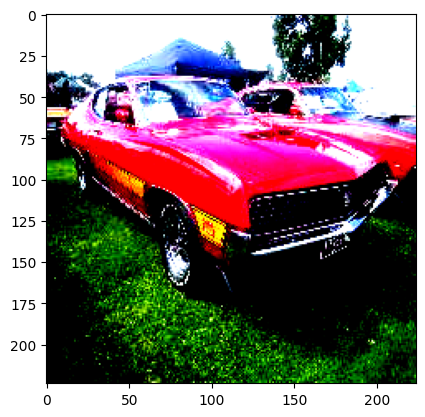

In [15]:

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                ])

train_dataset =  VehicleDataset('train2','/content/train_images',label = True,transform=transform)

print(len(train_dataset))
print(train_dataset[20][1])

plt.imshow(train_dataset[1][0].permute(1,2,0))

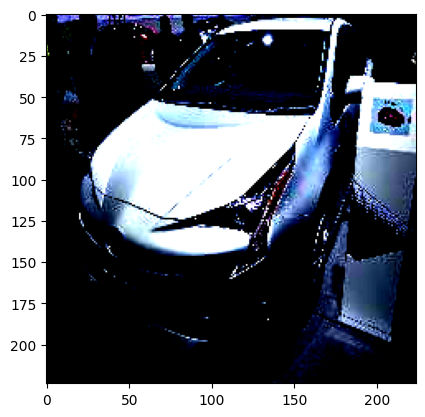

In [24]:
plt.imshow(train_dataset[0][0].permute(1,2,0))

In [16]:
import shutil
import os

source_file = "/content/Qualcomm-DL-Hackathon/test.csv"
destination_folder = "/content/test_images"

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

try:
    shutil.copy2(source_file, destination_folder)
    print(f"File '{source_file}' copied to '{destination_folder}' successfully.")
except FileNotFoundError:
    print(f"Error: Source file '{source_file}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

File '/content/Qualcomm-DL-Hackathon/test.csv' copied to '/content/test_images' successfully.


In [17]:
test_dataset = VehicleDataset('test','/content/test_images',transform=transform)

print(len(test_dataset))
test_dataset[0].shape

test
706


torch.Size([3, 224, 224])

In [18]:
train_dataset

In [19]:
torch.manual_seed(101)


batch_size = 32

val_pct = 0.2

val_size = int(val_pct * len(train_dataset))
train_size = len(train_dataset) - val_size

print(train_size,val_size)

train_ds, val_ds = random_split(train_dataset, [train_size, val_size])
len(train_ds), len(val_ds)



1312 328


(1312, 328)

# dataloaders

In [20]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size, num_workers=4, pin_memory=True)

train_dl = DeviceDataLoader(train_loader, device)
val_dl = DeviceDataLoader(val_loader, device)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [21]:
for i,y in train_dl:

  print(i.shape,y.shape)

  break

torch.Size([32, 3, 224, 224]) torch.Size([32, 2])


In [22]:
def show_batch(batch_size = 32,dl = None ):


    for image,label in dl:

        fig, ax = plt.subplots(figsize=(16, 16))
        ax.set_xticks([]); ax.set_yticks([])

        ax.imshow(make_grid(image.cpu(), nrow=5).permute(1, 2, 0))

        break


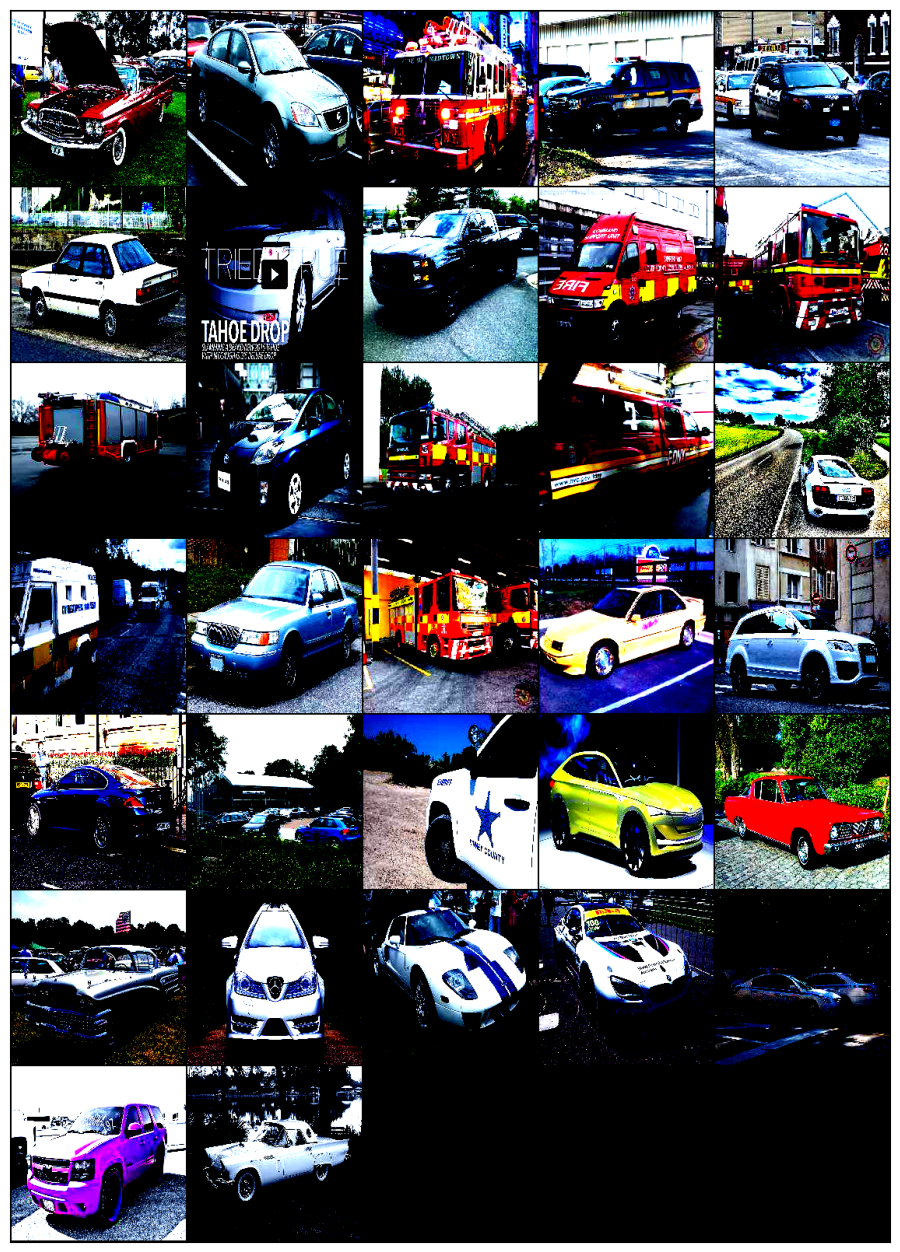

In [23]:
show_batch(dl = train_dl)

In [24]:
import gc
gc.collect()

8184

In [25]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    _,truths = torch.max(labels,dim = 1)
    return torch.tensor(torch.sum(preds == truths).item() / len(preds))



In [26]:
class ImageClassificationBase(nn.Module):

    def training_step(self, batch):
        images, targets = batch
        out = self(images)
        # _,out = torch.max(out,dim = 1)
        loss = F.binary_cross_entropy(torch.sigmoid(out), targets)
        return loss

    def validation_step(self, batch):
        images, targets = batch
        out = self(images)

                                                # Generate predictions
        loss = F.binary_cross_entropy(torch.sigmoid(out), targets)

        score = accuracy(out, targets)
        return {'val_loss': loss.detach(),'val_score':score.detach()}

    #this 2 methods will not change .

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_scores = [x['val_score'] for x in outputs]
        epoch_score = torch.stack(batch_scores).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_score': epoch_score.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_score: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_score']))

In [50]:
class EmergencyCustomModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(

            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d(1),

            nn.Flatten(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2),
            # nn.Sigmoid(),
        )
    def forward(self, xb):
        return self.network(xb)

In [51]:
device

device(type='cuda')

In [52]:
custom_model = to_device(EmergencyCustomModel(),device)


In [53]:
custom_model

EmergencyCustomModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stat

In [54]:
# custom_model.forward(torch.rand((1,3,200,200))).dtype

In [55]:

torch.cuda.empty_cache()

Training and Validation Methods

In [56]:
# defining the training method.

#using weight decay and cyclic lr , gradient clipping

@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader,
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []

    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    # sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs,
    #                                             steps_per_epoch=len(train_loader))

    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()

            # Gradient clipping
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            # # # Record & update learning rate
            # lrs.append(get_lr(optimizer))
            # sched.step()

        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history


def fit(epochs, max_lr, model, train_loader, val_loader,
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []

    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)

    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []

        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()

            # Gradient clipping
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()



        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history


In [57]:
evaluate(custom_model,val_dl)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


{'val_loss': 0.6955801844596863, 'val_score': 0.39772728085517883}

Using simple fit function.
Experimenting with weight decay and gradient clipping

Keeping everything constant and verying only one parameter eg. weight decay or gradient clipping.
We can observe who the parameter will effect the learnig


In [58]:
# using
wd = [10,1,1e-1,1e-2,1e-3,1e-4]
epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

hist = {}

for weight_decay in wd:

  print(weight_decay)
  custom_model = to_device(EmergencyCustomModel(),device)
  torch.cuda.empty_cache()
  hist[weight_decay] = fit(epochs,lr,custom_model,train_dl,val_dl,weight_decay,
                  opt_func = opt_func)


10
Epoch [0], train_loss: 0.6887, val_loss: 0.6894, val_score: 0.6023
Epoch [1], train_loss: 0.6911, val_loss: 0.6915, val_score: 0.6023
Epoch [2], train_loss: 0.6923, val_loss: 0.6925, val_score: 0.6023
Epoch [3], train_loss: 0.6928, val_loss: 0.6928, val_score: 0.6023
Epoch [4], train_loss: 0.6928, val_loss: 0.6928, val_score: 0.6023
Epoch [5], train_loss: 0.6929, val_loss: 0.6928, val_score: 0.6023
Epoch [6], train_loss: 0.6929, val_loss: 0.6927, val_score: 0.6023
Epoch [7], train_loss: 0.6928, val_loss: 0.6928, val_score: 0.6023
Epoch [8], train_loss: 0.6929, val_loss: 0.6927, val_score: 0.6023
Epoch [9], train_loss: 0.6928, val_loss: 0.6928, val_score: 0.6023
1
Epoch [0], train_loss: 0.6990, val_loss: 0.7007, val_score: 0.3977
Epoch [1], train_loss: 0.6967, val_loss: 0.6969, val_score: 0.3977
Epoch [2], train_loss: 0.6949, val_loss: 0.6943, val_score: 0.3977
Epoch [3], train_loss: 0.6933, val_loss: 0.6924, val_score: 0.6023
Epoch [4], train_loss: 0.6922, val_loss: 0.6913, val_scor

In [59]:
def get_df(hist,ls):
    data = {}

    for i in ls:
        train_loss = 0
        val_loss = 0
        val_score = 0
        for j in range(epochs):

            train_loss += hist[i][j]['train_loss']
            val_loss += hist[i][j]['val_loss']
            val_score += hist[i][j]['val_score']

        train_loss /= epochs
        val_loss /= epochs
        val_score /= epochs

        data[i] = [train_loss,val_loss,val_score]

    return pd.DataFrame(data,index = ['train_loss','val_loss','val_score']).T


In [60]:
get_df(hist,wd)

,train_loss,val_loss,val_score
10.0000,0.692196,0.692261,0.602273
1.0000,0.693125,0.692614,0.540909
0.1000,0.573579,0.713635,0.571591
0.0100,0.368326,1.168683,0.627273
0.0010,0.327112,0.741700,0.743182
0.0001,0.308163,0.803726,0.741761


Experimenting with Gradient Clipping.
Weight decay  = 1e-3

In [61]:
best_wd = 1e-3
gradient_clipping = [1,0.3,0.2,0.1,0.001,0]
epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

hist2 = {}

for clipping in gradient_clipping:

  print(clipping)
  custom_model = to_device(EmergencyCustomModel(),device)
  torch.cuda.empty_cache()
  hist2[clipping] = fit(epochs,lr,custom_model,train_dl,val_dl,best_wd,
                  clipping,opt_func = opt_func)


1


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [0], train_loss: 0.5707, val_loss: 0.5931, val_score: 0.7074
Epoch [1], train_loss: 0.4409, val_loss: 1.1815, val_score: 0.4915
Epoch [2], train_loss: 0.3705, val_loss: 1.0752, val_score: 0.5057
Epoch [3], train_loss: 0.3086, val_loss: 0.7439, val_score: 0.7983
Epoch [4], train_loss: 0.2766, val_loss: 0.3000, val_score: 0.8693
Epoch [5], train_loss: 0.2543, val_loss: 0.3827, val_score: 0.8295
Epoch [6], train_loss: 0.2604, val_loss: 0.3761, val_score: 0.8267
Epoch [7], train_loss: 0.2601, val_loss: 2.2911, val_score: 0.4347
Epoch [8], train_loss: 0.2290, val_loss: 0.3526, val_score: 0.8693
Epoch [9], train_loss: 0.2201, val_loss: 0.6072, val_score: 0.7699
0.3
Epoch [0], train_loss: 0.5380, val_loss: 0.4675, val_score: 0.8040
Epoch [1], train_loss: 0.3911, val_loss: 1.0145, val_score: 0.5994
Epoch [2], train_loss: 0.3321, val_loss: 2.2342, val_score: 0.6080
Epoch [3], train_loss: 0.3486, val_loss: 0.5515, val_score: 0.7358
Epoch [4], train_loss: 0.2940, val_loss: 0.4682, val_score

In [62]:
get_df(hist2,gradient_clipping)

,train_loss,val_loss,val_score
1.000,0.319100,0.790340,0.710227
0.300,0.311610,0.751659,0.742898
0.200,0.301663,0.694629,0.758807
0.100,0.297569,0.685202,0.747727
0.001,0.314460,0.794921,0.734091
0.000,0.332714,0.816384,0.724148


# With Weight decay 1e-4

In [63]:
best_wd = 1e-4
gradient_clipping = [1,0.3,0.2,0.1,0.001,0]
epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

hist2 = {}

for clipping in gradient_clipping:

  print(clipping)
  custom_model = to_device(EmergencyCustomModel(),device)
  torch.cuda.empty_cache()
  hist2[clipping] = fit(epochs,lr,custom_model,train_dl,val_dl,best_wd,
                  clipping,opt_func = opt_func)


1


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [0], train_loss: 0.5136, val_loss: 0.5595, val_score: 0.7301
Epoch [1], train_loss: 0.3848, val_loss: 0.7758, val_score: 0.6222
Epoch [2], train_loss: 0.3483, val_loss: 0.3674, val_score: 0.8210
Epoch [3], train_loss: 0.3084, val_loss: 0.7140, val_score: 0.7017
Epoch [4], train_loss: 0.3011, val_loss: 1.3816, val_score: 0.6023
Epoch [5], train_loss: 0.2481, val_loss: 1.0911, val_score: 0.6506
Epoch [6], train_loss: 0.2420, val_loss: 0.7088, val_score: 0.7670
Epoch [7], train_loss: 0.1976, val_loss: 0.5596, val_score: 0.8494
Epoch [8], train_loss: 0.2009, val_loss: 3.3945, val_score: 0.4602
Epoch [9], train_loss: 0.2042, val_loss: 0.8604, val_score: 0.7017
0.3
Epoch [0], train_loss: 0.5962, val_loss: 1.3160, val_score: 0.6108
Epoch [1], train_loss: 0.4480, val_loss: 0.5527, val_score: 0.7358
Epoch [2], train_loss: 0.3553, val_loss: 0.4402, val_score: 0.7926
Epoch [3], train_loss: 0.3203, val_loss: 1.1838, val_score: 0.5455
Epoch [4], train_loss: 0.2809, val_loss: 0.8802, val_score

In [64]:
get_df(hist2,gradient_clipping)

,train_loss,val_loss,val_score
1.000,0.294898,1.041270,0.690625
0.300,0.310536,0.647209,0.755398
0.200,0.301764,0.720300,0.746591
0.100,0.291659,0.654284,0.768466
0.001,0.298279,1.534467,0.748864
0.000,0.304405,0.419657,0.823295


For weight decay 1e-3 the heighest val score is 78 and for weight deacy 1e-4 the height score is 77

but its can be seen that the model overfits more when weight decay is 1e-3 then 1e-4.

So going for weight decay 1e-4 and no gradient clipping

In [65]:
# final Learning with
lr  = 1e-3
epochs = 20

best_wd = 1e-4
gradient_clipping = 0


custom_model = to_device(EmergencyCustomModel(),device)
torch.cuda.empty_cache()
hist = fit(epochs,lr,custom_model,train_dl,val_dl,best_wd,
                gradient_clipping,opt_func = opt_func)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [0], train_loss: 0.5372, val_loss: 0.6888, val_score: 0.6903
Epoch [1], train_loss: 0.3770, val_loss: 1.4320, val_score: 0.6307
Epoch [2], train_loss: 0.3326, val_loss: 0.7391, val_score: 0.6648
Epoch [3], train_loss: 0.2957, val_loss: 0.3309, val_score: 0.8494
Epoch [4], train_loss: 0.2814, val_loss: 1.1697, val_score: 0.5369
Epoch [5], train_loss: 0.2417, val_loss: 1.3729, val_score: 0.4943
Epoch [6], train_loss: 0.2119, val_loss: 0.5400, val_score: 0.7670
Epoch [7], train_loss: 0.1987, val_loss: 0.9258, val_score: 0.7500
Epoch [8], train_loss: 0.2059, val_loss: 1.4908, val_score: 0.6278
Epoch [9], train_loss: 0.2136, val_loss: 0.3000, val_score: 0.8523
Epoch [10], train_loss: 0.1545, val_loss: 0.6252, val_score: 0.8182
Epoch [11], train_loss: 0.1754, val_loss: 0.3741, val_score: 0.8750
Epoch [12], train_loss: 0.1178, val_loss: 0.9381, val_score: 0.7898
Epoch [13], train_loss: 0.0848, val_loss: 0.8867, val_score: 0.7642
Epoch [14], train_loss: 0.0736, val_loss: 0.3522, val_scor

In [66]:
len(hist)

20

In [67]:
def plot(hist,epochs = 10):
  train_loss = []
  val_loss = []
  val_score = []
  for i in range(epochs):

      train_loss.append(hist[i]['train_loss'])
      val_loss.append(hist[i]['val_loss'])
      val_score.append(hist[i]['val_score'])

  plt.plot(train_loss,label = 'train_loss')
  plt.plot(val_loss,label = 'val_loss')
  plt.legend()
  plt.title('loss')

  plt.figure()
  plt.plot(val_score,label = 'val_score')
  plt.legend()
  plt.title('accuarcy')


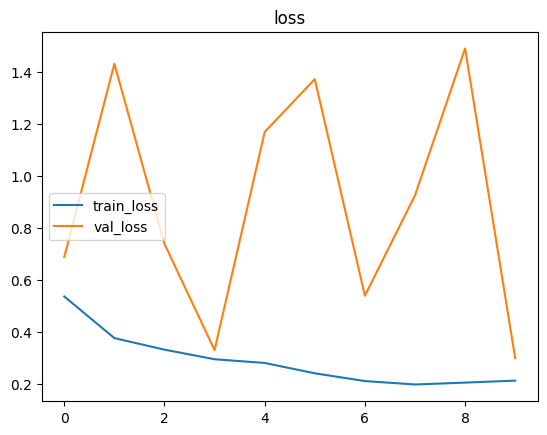

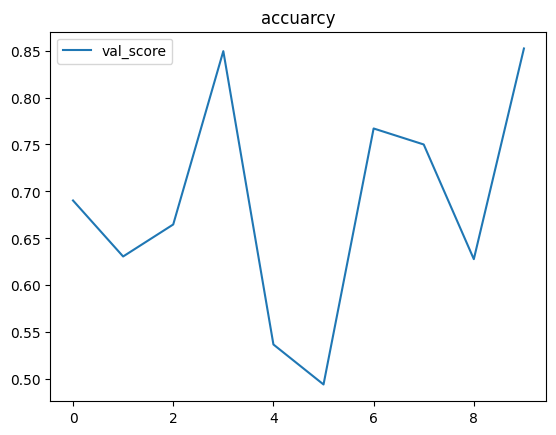

In [68]:
plot(hist)

To reduce the overfitting by  using dropout

In [69]:
models.resnet50(pretrained=True).fc.in_features

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


2048

In [70]:
class ResNet50(ImageClassificationBase):

    def __init__(self):
      super().__init__()
      self.pretrained_model = models.resnet50(pretrained = True)

      feature_in = self.pretrained_model.fc.in_features
      self.pretrained_model.fc = nn.Linear(feature_in,2)

    def forward(self,x):
      return self.pretrained_model(x)

In [71]:
# final Learning with
lr  = 1e-4
epochs = 5
opt_func = torch.optim.Adam
best_wd = 1e-4
gradient_clipping = 0


custom_model = to_device(ResNet50(),device)
torch.cuda.empty_cache()
hist = fit(epochs,lr,custom_model,train_dl,val_dl,best_wd,
                gradient_clipping,opt_func = opt_func)


Epoch [0], train_loss: 0.2465, val_loss: 0.1634, val_score: 0.9375
Epoch [1], train_loss: 0.0581, val_loss: 0.1060, val_score: 0.9631
Epoch [2], train_loss: 0.0259, val_loss: 0.1309, val_score: 0.9517
Epoch [3], train_loss: 0.0087, val_loss: 0.1323, val_score: 0.9659
Epoch [4], train_loss: 0.0053, val_loss: 0.1317, val_score: 0.9631


Wow!! Using the same model i keras (resnet 50) I could get highest accuracy of 94 % here is 96% and sometimes 97%

In [72]:
plot(hist)

IndexError: list index out of range

In [41]:
torch.save(custom_model.cpu(),'/content/Qualcomm-DL-Hackathon/resnet50.pth')

In [43]:

custom_model = to_device(ResNet50(),device)
torch.cuda.empty_cache()
hist = fit_one_cycle(5, 1e-4, custom_model, train_dl, val_dl,
                  weight_decay=1e-4, grad_clip=0, opt_func=torch.optim.Adam)

Epoch [0], train_loss: 0.2455, val_loss: 0.1216, val_score: 0.9517
Epoch [1], train_loss: 0.0416, val_loss: 0.1141, val_score: 0.9773
Epoch [2], train_loss: 0.0119, val_loss: 0.1280, val_score: 0.9659
Epoch [3], train_loss: 0.0074, val_loss: 0.1346, val_score: 0.9631
Epoch [4], train_loss: 0.0125, val_loss: 0.1838, val_score: 0.9517


In [45]:
loaded_ResNet50 = ResNet50()
# Modified ipython-input-41-61036f1e9ae2
torch.save(custom_model.cpu().state_dict(),'/content/Qualcomm-DL-Hackathon/resnet50.pth')
#loaded_ResNet50.load_state_dict(torch.load('/content/Qualcomm-DL-Hackathon/resnet50.pth'))
loaded_ResNet50.eval()
print('loaded')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


loaded


In [46]:
plot(hist,15)

IndexError: list index out of range

Densenet

In [73]:
class Densenet169(ImageClassificationBase):

    def __init__(self):
      super().__init__()
      self.pretrained_model = models.densenet169(pretrained = True)

      feature_in = self.pretrained_model.classifier.in_features
      self.pretrained_model.classifier = nn.Linear(feature_in,2)

    def forward(self,x):
      return self.pretrained_model(x)

In [74]:
# final Learning with
lr  = 1e-4
epochs = 5
opt_func = torch.optim.Adam
best_wd = 1e-4
gradient_clipping = 0


custom_model2 = to_device(Densenet169(),device)
torch.cuda.empty_cache()
hist = fit(epochs,lr,custom_model2,train_dl,val_dl,best_wd,
                gradient_clipping,opt_func = opt_func)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet169_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet169_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/hub/checkpoints/densenet169-b2777c0a.pth
100%|██████████| 54.7M/54.7M [00:00<00:00, 77.4MB/s]


Epoch [0], train_loss: 0.2564, val_loss: 0.1393, val_score: 0.9403
Epoch [1], train_loss: 0.0668, val_loss: 0.1081, val_score: 0.9631
Epoch [2], train_loss: 0.0231, val_loss: 0.1066, val_score: 0.9631
Epoch [3], train_loss: 0.0113, val_loss: 0.1053, val_score: 0.9659
Epoch [4], train_loss: 0.0089, val_loss: 0.1261, val_score: 0.9659


In [75]:
plot(hist)

IndexError: list index out of range

# Saving the Model

In [77]:
# torch.save(custom_model2.cpu(),'models/densenet.pth')

torch.save(custom_model2.state_dict(),'/content/Qualcomm-DL-Hackathon/densenet169_final.pt')

#Loading Model

In [80]:
loaded_densenet169 = Densenet169()
loaded_densenet169.load_state_dict(torch.load('/content/Qualcomm-DL-Hackathon/densenet169_final.pt'))
loaded_densenet169.eval()
print('loaded')

<ipython-input-80-455150f296ea>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_densenet169.load_state_dict(torch.load('/content/Qualcomm-DL-Hackathon/densenet169_fi

loaded


Preparation Submission File

In [82]:

preds = []
for test_image in test_dataset:
    test_image = test_image.view(1,3,224,224)
    pred  = loaded_densenet169.forward(test_image)
    _,idx = torch.max(pred,dim = 1)
    idx = idx.numpy()[0]
    preds.append(idx)

In [83]:
pd.Series(preds).value_counts()

,count
0,407
1,299


In [85]:
subs = pd.read_csv('/content/Qualcomm-DL-Hackathon/sample_submission.csv')
subs.head()

,image_names,emergency_or_not
0,1960.jpg,0
1,668.jpg,0
2,2082.jpg,0
3,808.jpg,0
4,1907.jpg,0


In [86]:
subs['emergency_or_not'] = preds
subs.to_csv('densenet169_epochs5.csv',index = False)

In [87]:

preds = []
for image,labels in train_dataset:


    image = image.view(1,3,224,224)

    pred  = loaded_densenet169.forward(img)
    _,idx = torch.max(pred,dim = 1)
    idx = idx.numpy()[0]
    preds.append(idx)
    print(idx)
    break





NameError: name 'img' is not defined